In [16]:
import pandas as pd
import numpy as np

# Parameters for Solar Power Generation
np.random.seed(42)  # For reproducibility

days = 10000  # Number of rows to generate
solar_irradiance = np.random.uniform(800, 1100, days)  # W/m², random between 800 and 1100
panel_area = 15  # m², constant
efficiency = np.random.uniform(15, 22, days)  # %, random between 15% and 22%
sunlight_hours = np.random.uniform(4, 8, days)  # Hours of sunlight between 4 and 8 hours

# Energy Output for Solar Power Generation (kWh)
energy_output = (solar_irradiance * panel_area * (efficiency / 100) * sunlight_hours) / 1000  # Conversion to kWh

# Creating the Solar Power DataFrame
solar_data = pd.DataFrame({
    'Day': np.arange(1, days + 1),
    'Solar Irradiance (W/m²)': solar_irradiance,
    'Panel Area (m²)': panel_area,
    'Efficiency (%)': efficiency,
    'Sunlight Hours (hrs)': sunlight_hours,
    'Energy Output (kWh)': energy_output
})

# Parameters for Electric Power Generation
plant_capacity = 100  # MW, constant
efficiency_electric = 40  # %, constant for now
demand = np.random.uniform(50, 100, days)  # MW, random demand between 50 and 100
fuel_consumption = np.random.uniform(1.5, 3, days)  # Tons, random between 1.5 and 3

# Power Generated (MW)
power_generated = plant_capacity * (efficiency_electric / 100) * (demand / plant_capacity)

# Creating the Electric Power DataFrame
electric_data = pd.DataFrame({
    'Hour': np.arange(1, days + 1),
    'Plant Capacity (MW)': plant_capacity,
    'Efficiency (%)': efficiency_electric,
    'Demand (MW)': demand,
    'Fuel Consumption (tons)': fuel_consumption,
    'Power Generated (MW)': power_generated
})

# Saving the data to CSV files
solar_data.to_csv('solar_power_data.csv', index=False)
electric_data.to_csv('electric_power_data.csv', index=False)

print("Data generation complete. Files saved as 'solar_power_data.csv' and 'electric_power_data.csv'")


Data generation complete. Files saved as 'solar_power_data.csv' and 'electric_power_data.csv'


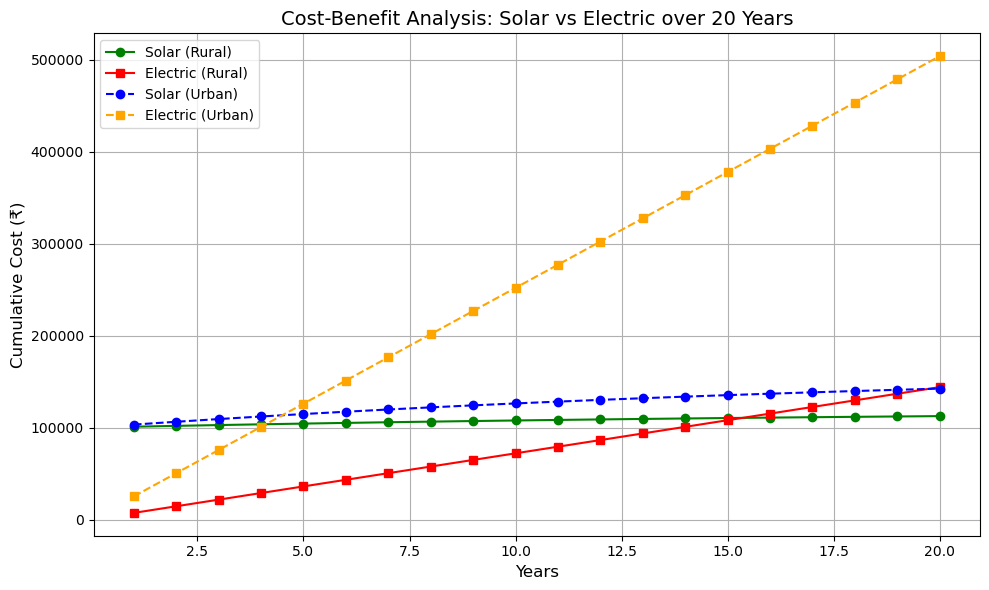

Payback Period (Rural): 16 years
Payback Period (Urban): 5 years


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
solar_installation_cost = 100000  # Initial cost in INR
solar_maintenance_cost_per_year = 5000  # Annual maintenance cost in INR
solar_generation_rural = 1500  # kWh per year for rural solar
solar_generation_urban = 1200  # kWh per year for urban solar

# Electric Power
tariff_rural = 4  # INR/kWh for rural areas
tariff_urban = 7  # INR/kWh for urban areas
consumption_rural_per_year = 1800  # Annual consumption in kWh for rural
consumption_urban_per_year = 3600  # Annual consumption in kWh for urban

# Economic Parameters
discount_rate = 0.05  # 5% discount rate
years = np.arange(1, 21)  # 20 years for analysis

# NPV for Solar Savings
def npv_solar_savings(generation_per_year, maintenance_cost, tariff, years, discount_rate):
    npv_savings = []
    for year in years:
        savings = generation_per_year * tariff  # Savings equivalent to replacing grid electricity
        npv_saving = (savings - maintenance_cost) / ((1 + discount_rate) ** year)
        npv_savings.append(npv_saving)
    return np.cumsum(npv_savings)

# Total Electric Costs Over Time
def electric_cost_per_year(tariff, consumption_per_year, years):
    return np.cumsum([tariff * consumption_per_year for _ in years])

# Solar and Electric Costs for Rural
npv_solar_rural = npv_solar_savings(solar_generation_rural, solar_maintenance_cost_per_year, tariff_rural, years, discount_rate)
electric_rural_cost = electric_cost_per_year(tariff_rural, consumption_rural_per_year, years)

# Solar and Electric Costs for Urban
npv_solar_urban = npv_solar_savings(solar_generation_urban, solar_maintenance_cost_per_year, tariff_urban, years, discount_rate)
electric_urban_cost = electric_cost_per_year(tariff_urban, consumption_urban_per_year, years)

# Solar costs include installation
solar_rural_cost_with_installation = solar_installation_cost + npv_solar_rural
solar_urban_cost_with_installation = solar_installation_cost + npv_solar_urban

# Plot Cumulative Costs
plt.figure(figsize=(10, 6))

plt.plot(years, solar_rural_cost_with_installation, label="Solar (Rural)", marker='o', linestyle='-', color='green')
plt.plot(years, electric_rural_cost, label="Electric (Rural)", marker='s', linestyle='-', color='red')
plt.plot(years, solar_urban_cost_with_installation, label="Solar (Urban)", marker='o', linestyle='--', color='blue')
plt.plot(years, electric_urban_cost, label="Electric (Urban)", marker='s', linestyle='--', color='orange')

plt.title('Cost-Benefit Analysis: Solar vs Electric over 20 Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Cumulative Cost (₹)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Payback Period Calculation for Solar (Rural and Urban)
payback_period_rural = np.where(solar_rural_cost_with_installation < electric_rural_cost)[0][0] + 1  # first year when solar cost < electric
payback_period_urban = np.where(solar_urban_cost_with_installation < electric_urban_cost)[0][0] + 1  # first year when solar cost < electric

print(f"Payback Period (Rural): {payback_period_rural} years")
print(f"Payback Period (Urban): {payback_period_urban} years")


Summary of Power Output, Energy Generated, and CO2 Savings:
  Efficiency (%) Power Output (kW)           Energy Per Year (kWh)          \
                               min  max mean                   min     max   
0           15.0               1.8  3.0  2.4                3285.0  5475.0   
1           17.5               2.1  3.5  2.8                3832.5  6387.5   
2           20.0               2.4  4.0  3.2                4380.0  7300.0   
3           22.5               2.7  4.5  3.6                4927.5  8212.5   
4           25.0               3.0  5.0  4.0                5475.0  9125.0   

          CO2 Savings (kg/year)                  
     mean                   min     max    mean  
0  4380.0                3022.2  5037.0  4029.6  
1  5110.0                3525.9  5876.5  4701.2  
2  5840.0                4029.6  6716.0  5372.8  
3  6570.0                4533.3  7555.5  6044.4  
4  7300.0                5037.0  8395.0  6716.0  


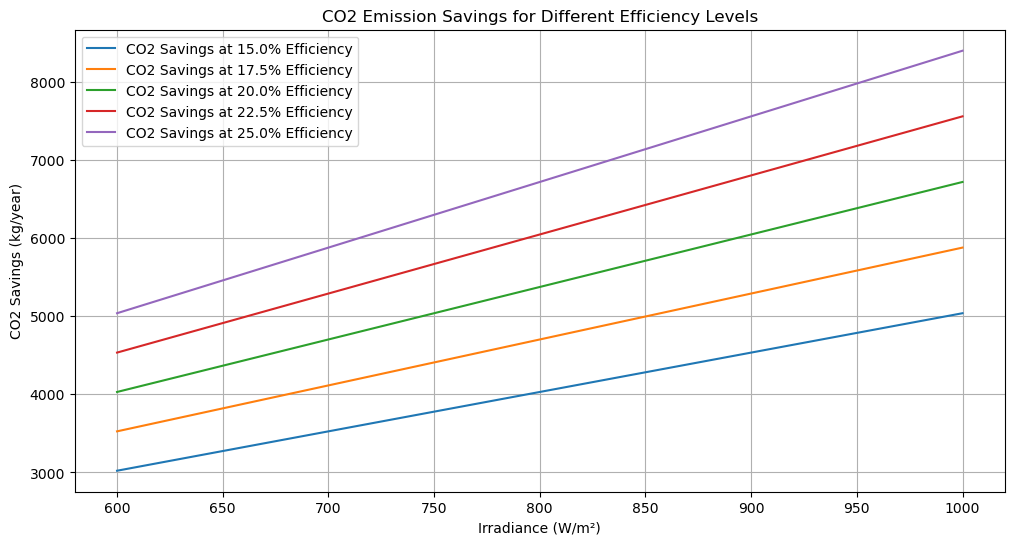

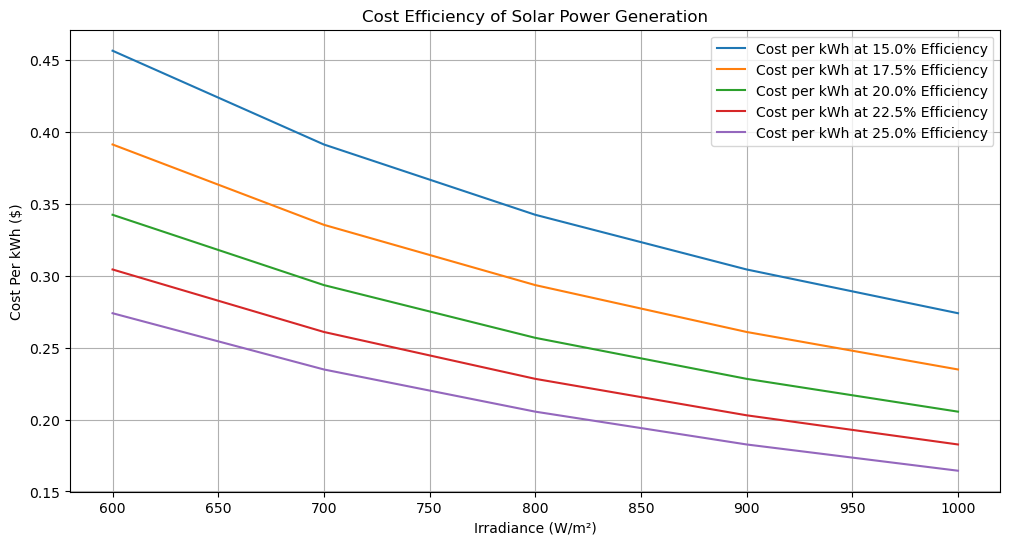

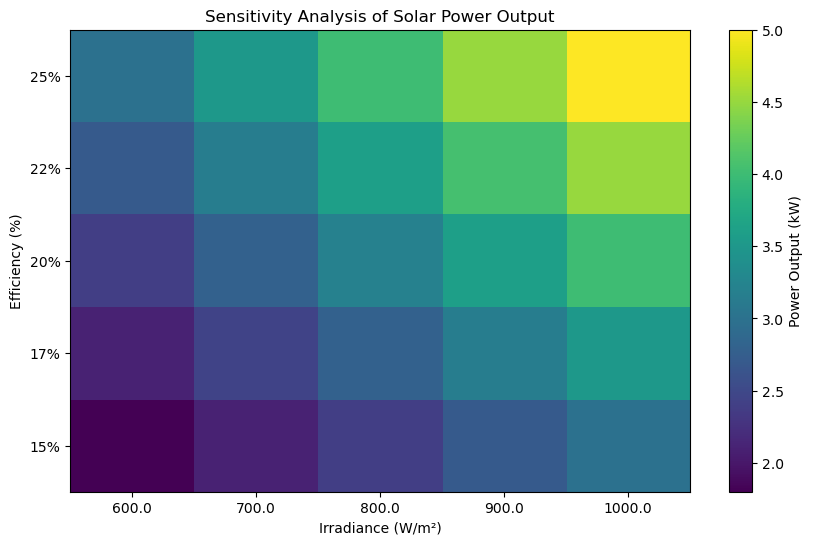

,Efficiency (%),Irradiance (W/m²),Power Output (kW),Energy Per Day (kWh),Energy Per Year (kWh),CO2 Savings (kg/year),Cost Per kWh ($)
0,15.0,600.0,1.80,9.00,3285.00,3022.20,0.456621
1,15.0,700.0,2.10,10.50,3832.50,3525.90,0.391389
2,15.0,800.0,2.40,12.00,4380.00,4029.60,0.342466
3,15.0,900.0,2.70,13.50,4927.50,4533.30,0.304414
4,15.0,1000.0,3.00,15.00,5475.00,5037.00,0.273973
5,17.5,600.0,2.10,10.50,3832.50,3525.90,0.391389
6,17.5,700.0,2.45,12.25,4471.25,4113.55,0.335477
7,17.5,800.0,2.80,14.00,5110.00,4701.20,0.293542
8,17.5,900.0,3.15,15.75,5748.75,5288.85,0.260926
9,17.5,1000.0,3.50,17.50,6387.50,5876.50,0.234834


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
area = 20  # Area of solar panels in m²
efficiency_range = np.linspace(0.15, 0.25, 5)  # Efficiency from 15% to 25%
irradiance_range = np.linspace(600, 1000, 5)  # Irradiance from 600 W/m² to 1000 W/m²
operating_hours = 5  # Operating hours per day (average)
days_per_year = 365  # Number of days in a year

# CO2 emissions savings: 0.92 kg CO2 per kWh of coal-generated electricity
co2_per_kWh = 0.92  # kg CO2 per kWh

# Cost assumptions
cost_per_kW_installation = 1500  # Cost per kW installed ($)
results = []

# 1. Power output, energy, CO2 savings, and cost analysis
for efficiency in efficiency_range:
    for irradiance in irradiance_range:
        power_output = efficiency * irradiance * area  # Power in Watts
        power_output_kW = power_output / 1000  # Convert to kW
        energy_per_day = power_output_kW * operating_hours  # Energy per day in kWh
        energy_per_year = energy_per_day * days_per_year  # Energy per year in kWh
        
        # CO2 savings
        co2_savings_per_year = energy_per_year * co2_per_kWh  # CO2 savings in kg

        # Cost per kWh based on installation cost and yearly energy generation
        cost_per_kWh = cost_per_kW_installation / energy_per_year
        
        results.append({
            'Efficiency (%)': efficiency * 100,
            'Irradiance (W/m²)': irradiance,
            'Power Output (kW)': power_output_kW,
            'Energy Per Day (kWh)': energy_per_day,
            'Energy Per Year (kWh)': energy_per_year,
            'CO2 Savings (kg/year)': co2_savings_per_year,
            'Cost Per kWh ($)': cost_per_kWh
        })

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results)

# 2. Power Output Range Analysis (min, max, average)
summary_stats = results_df.groupby('Efficiency (%)').agg({
    'Power Output (kW)': ['min', 'max', 'mean'],
    'Energy Per Year (kWh)': ['min', 'max', 'mean'],
    'CO2 Savings (kg/year)': ['min', 'max', 'mean']
}).reset_index()

print("Summary of Power Output, Energy Generated, and CO2 Savings:")
print(summary_stats)

# 3. Visualization: Trends of CO2 Savings and Cost Efficiency
plt.figure(figsize=(12, 6))

# Plot CO2 savings for different efficiency levels
for efficiency in efficiency_range * 100:
    df = results_df[results_df['Efficiency (%)'] == efficiency]
    plt.plot(df['Irradiance (W/m²)'], df['CO2 Savings (kg/year)'], label=f'CO2 Savings at {efficiency:.1f}% Efficiency')

plt.xlabel('Irradiance (W/m²)')
plt.ylabel('CO2 Savings (kg/year)')
plt.title('CO2 Emission Savings for Different Efficiency Levels')
plt.legend()
plt.grid(True)

# Save the CO2 savings plot as an image
plt.savefig('co2_savings.png', dpi=300)

plt.show()

# 4. Plot cost per kWh for different efficiency levels
plt.figure(figsize=(12, 6))

# Plot cost per kWh for different efficiency levels
for efficiency in efficiency_range * 100:
    df = results_df[results_df['Efficiency (%)'] == efficiency]
    plt.plot(df['Irradiance (W/m²)'], df['Cost Per kWh ($)'], label=f'Cost per kWh at {efficiency:.1f}% Efficiency')

plt.xlabel('Irradiance (W/m²)')
plt.ylabel('Cost Per kWh ($)')
plt.title('Cost Efficiency of Solar Power Generation')
plt.legend()
plt.grid(True)

# Save the cost efficiency plot as an image
plt.savefig('cost_efficiency.png', dpi=300)

plt.show()

# Heatmap visualization
pivot_table = results_df.pivot(index='Efficiency (%)', columns='Irradiance (W/m²)', values='Power Output (kW)')
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(pivot_table, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(heatmap, label='Power Output (kW)')
plt.xticks(ticks=np.arange(len(irradiance_range)), labels=irradiance_range)
plt.yticks(ticks=np.arange(len(efficiency_range)), labels=[f"{int(e)}%" for e in efficiency_range * 100])
plt.xlabel('Irradiance (W/m²)')
plt.ylabel('Efficiency (%)')
plt.title('Sensitivity Analysis of Solar Power Output')

# Save the heatmap as an image
plt.savefig('power_output_heatmap.png', dpi=300)

plt.show()

# Display the results DataFrame
results_df
